ZERO
ZERO
ZERO
ZERO
ZERO
141


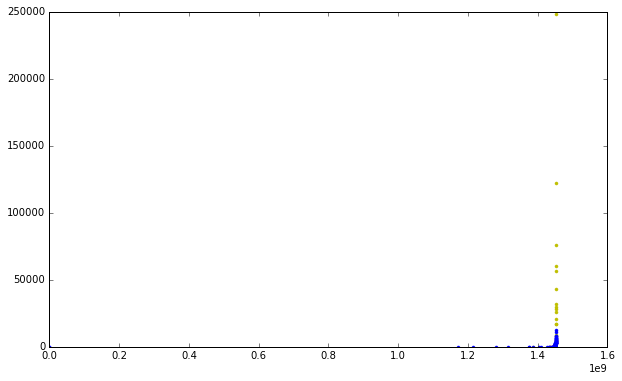

In [6]:
from numpy import *

% matplotlib inline

import matplotlib.pyplot as plt

from Orange.data import Table
import collections
from csv import DictReader
from collections import OrderedDict
import pylab
from datetime import date
import numpy as np
import time
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from plotting import plot_fit_residual, plot_coefficients

reader = DictReader(open( "Top5000.csv" , "rt" , encoding="utf-8" ))
reader2 = DictReader(open( "Financial_Info.csv" , "rt" , encoding="utf-8" ))

subs=[]
views=[]
uploads=[]


subsE=[]
viewsE=[]
uploadsE=[]
datezE=[]
PE=[]
KE=[]

subsM=[]
viewsM=[]
uploadsM=[]
datezM=[]
PM=[]
KM=[]

subsG=[]
viewsG=[]
uploadsG=[]
datezG=[]
PG=[]
KG=[]


subsF=[]
viewsF=[]
uploadsF=[]

subsP=[]
viewsP=[]
uploadsP=[]

datezO=[]
PO=[]

free=[]
P2015=[]
for row in reader2:
    network=row["network"]
    channelId=row["channelId"]
    if network=="None":
        free.append(channelId)

for row in reader:
    channelId=row["channelId"]
    if channelId in free:
        pass
    else:
        pass
        
    name=row["name"]
    link=row["link"]
    if "VEVO" in name:
        pass
    c=row["category"]
    s=row["subscribers"]
    v=row["views"]
    u=row["uploads"]
    try:
        
        datez=str(row["date"])
        if datez.split("-")[0]=="2015":
            pass
        else:
            continue
            
        yearz=datez.split("-")[0]
        monthz=datez.split("-")[1]
        dayz=datez.split("-")[2]
        datez=date(int(yearz),int(monthz),int(dayz))
        datez=time.mktime(datez.timetuple())
    except Exception as e:
        continue
    
    if int(u)==0:
        continue
    
    if s.isdigit() and v.isdigit() and u.isdigit():
            if c=="Games":
                s=int(s)
                v=int(v)
                u=int(u)
                uploadsG.append(u)
                subsG.append(s)
                viewsG.append(v)
                datezG.append(datez)
                PG.append(s/u)
                P2015.append((name,link))
            elif c=="Entertainment":
                s=int(s)
                v=int(v)
                u=int(u)
                uploadsE.append(u)
                subsE.append(s)
                viewsE.append(v)
                datezE.append(datez)
                PE.append(s/u)
            elif c=="Music":
                s=int(s)
                v=int(v)
                u=int(u)
                uploadsM.append(u)
                subsM.append(s)
                viewsM.append(v)
                datezM.append(datez)
                PM.append(s/u)
                #P2015.append((name,link))
            else:
                s=int(s)
                v=int(v)
                u=int(u)
                uploads.append(u)
                subs.append(s)
                views.append(v)
                datezO.append(datez)
                PO.append(s/u)
                #P2015.append((name,link))


plt.figure(figsize=(10, 6))



viewsG=np.array(viewsG)
uploadsG=np.array(uploadsG)

rng_state = np.random.get_state()
np.random.shuffle(viewsG)
np.random.set_state(rng_state)
np.random.shuffle(uploadsG)

datezEx=[1451606400 for x in datezE]
datezMx=[1451606400 for x in datezM]
datezGx=[1451606400 for x in datezG]

def LinearK(x1,y1,x2,y2):
    return (y2-y1/x2-x1)

for i in range(0,len(datezE)):
    #plt.plot([datezE[i],1451606400],[0,PE[i]],color='b')
    try:
        KE.append(LinearK(0,datezE[i],PE[i],1451606400))
    except Exception as e:
        KE.append(0)
        print("ZERO")




for i in range(0,len(datezM)):
    #plt.plot([datezM[i],1451606400],[0,PM[i]],color='y')
    try:
        KM.append(LinearK(0,datezM[i],PM[i],1451606400))
    except Exception as e:
        print("ZERO")
        KM.append(0)
    

for i in range(0,len(datezG)):
    #plt.plot([datezG[i],1451606400],[0,PG[i]],color='r')
    try:
        KG.append(LinearK(0,datezG[i],PG[i],1451606400))
    except Exception as e:
        print("ZERO")
        KG.append(0)
    
print(len(PG)+len(PM)+len(PE))
plt.plot(KG, PG, "r.",label="Games")
plt.plot(KM, PM, "y.",label="Music")
plt.plot(KE, PE, "b.",label="Entertainment")

#plt.plot([1104537600,1104537600],[400000,0],color='b')#2005
#plt.plot([1136073600,1136073600],[400000,0],color='b')#2006
#plt.plot([1167609600,1167609600],[400000,0],color='b')#2007
#plt.plot([1199145600,1199145600],[400000,0],color='b')#2008
#plt.plot([1230768000,1230768000],[400000,0],color='b')#2009
#plt.plot([1262304000,1262304000],[400000,0],color='b')#2010
#plt.plot([1293840000,1293840000],[400000,0],color='b')#2011
#plt.plot([1325376000,1325376000],[400000,0],color='b')#2012
#plt.plot([1356998400,1356998400],[400000,0],color='b')#2013
#plt.plot([1388534400,1388534400],[400000,0],color='b')#2014
#plt.plot([1420070400,1420070400],[400000,0],color='b')#2015
#plt.plot([1451606400,1451606400],[400000,0],color='b')#2016

#plt.plot(viewsF, subsF, "y.",label="Film")
#plt.plot(viewsP, subsP, "g.",label="People")

#plt.plot(datezO, PO, "k.",label="Other")

#Ogledi - Naročniki
#plt.axis([0, 1475606400, 0, 100000])



#plt.xlabel("Linearni koeficient k")
#plt.ylabel("Faktor perspektivnosti p")
#plt.legend(loc='upper right')
#plt.show()

